**LEVEL 2**

🎯 Objective

To analyze restaurant performance and customer behavior through ratings, cuisine patterns, location trends, and restaurant chain insights for data-driven decision-making.

🧩 Approach

1. Ratings & Votes: Cleaned missing data, calculated averages, and visualized rating distribution.

2. Cuisine Combinations: Identified top 10 cuisine pairs and analyzed their average ratings.

3. Geographic Distribution: Mapped restaurant locations by longitude and latitude, colored by rating.

4. Restaurant Chains: Aggregated branches, ratings, and votes to identify top-performing chains.

Import libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [7]:
df = pd.read_csv('/content/Dataset 1.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**TASK 1 : Restaurant Ratings**

 Most common rating: 0.0 stars
 Average number of votes per restaurant: 156.91


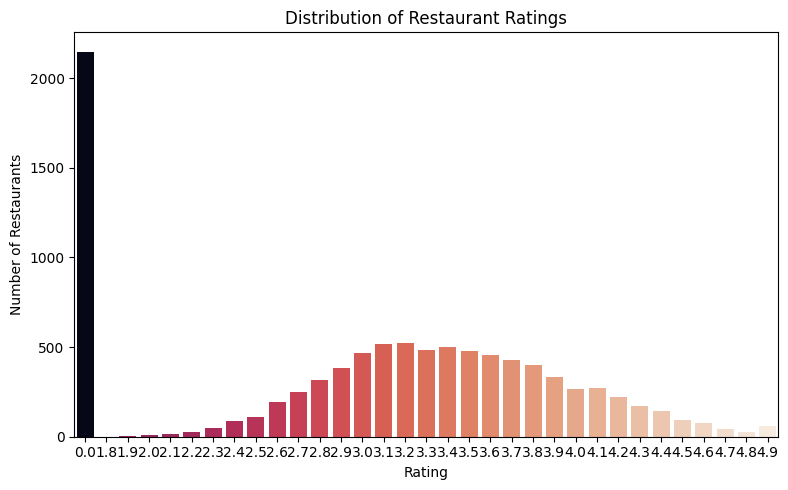

In [8]:
# Clean: drop rows with missing ratings or votes
df = df.dropna(subset=['Aggregate rating', 'Votes'])

# Convert to numeric
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Rating distribution
rating_counts = df['Aggregate rating'].value_counts().sort_index()

# Most common rating
most_common_rating = rating_counts.idxmax()
print(f" Most common rating: {most_common_rating} stars")

# Average votes
avg_votes = df['Votes'].mean()
print(f" Average number of votes per restaurant: {avg_votes:.2f}")

# Plot distribution (no warning version)
rating_df = pd.DataFrame({'Rating': rating_counts.index, 'Count': rating_counts.values})
plt.figure(figsize=(8,5))
sns.barplot(data=rating_df, x='Rating', y='Count', hue='Rating', palette='rocket', legend=False)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

**TASK 2: Cuisine Combination**

Top 10 Cuisine Combos:
               Cuisine Combination  Count
0                    North Indian    936
1           North Indian, Chinese    511
2                         Chinese    354
3                       Fast Food    354
4           North Indian, Mughlai    334
5                            Cafe    299
6                          Bakery    218
7  North Indian, Mughlai, Chinese    197
8                Bakery, Desserts    170
9                     Street Food    149


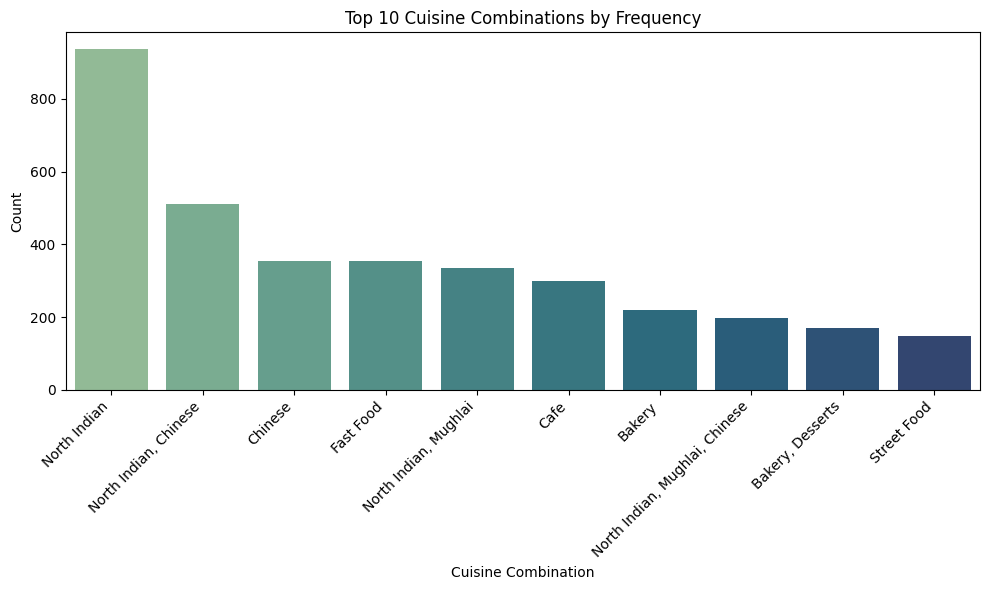

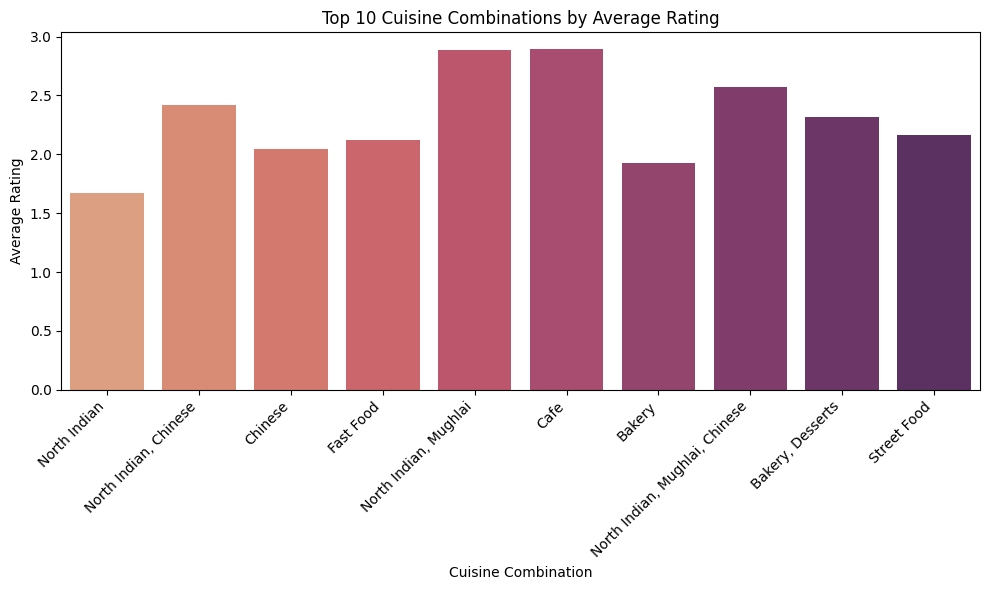

In [9]:
# Clean & prep
df = df.dropna(subset=['Cuisines', 'Aggregate rating'])
df['Cuisines'] = df['Cuisines'].str.strip()
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Count frequent cuisine combinations
combo_counts = df['Cuisines'].value_counts().reset_index()
combo_counts.columns = ['Cuisine Combination', 'Count']

# Top 10 combinations
top_combos = combo_counts.head(10)
print("Top 10 Cuisine Combos:\n", top_combos)

# Ratings for top 10 combos
top_combo_ratings = df[df['Cuisines'].isin(top_combos['Cuisine Combination'])]
avg_rating_per_combo = top_combo_ratings.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
avg_rating_per_combo.columns = ['Cuisine Combination', 'Average Rating']

# Merge for final output
combo_summary = pd.merge(top_combos, avg_rating_per_combo, on='Cuisine Combination')

# Plot (clean)
plt.figure(figsize=(10,6))
sns.barplot(data=combo_summary, x='Cuisine Combination', y='Count', hue='Cuisine Combination', palette='crest', legend=False)
plt.title("Top 10 Cuisine Combinations by Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=combo_summary, x='Cuisine Combination', y='Average Rating', hue='Cuisine Combination', palette='flare', legend=False)
plt.title("Top 10 Cuisine Combinations by Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**TASK 3: Geographic Analysis**

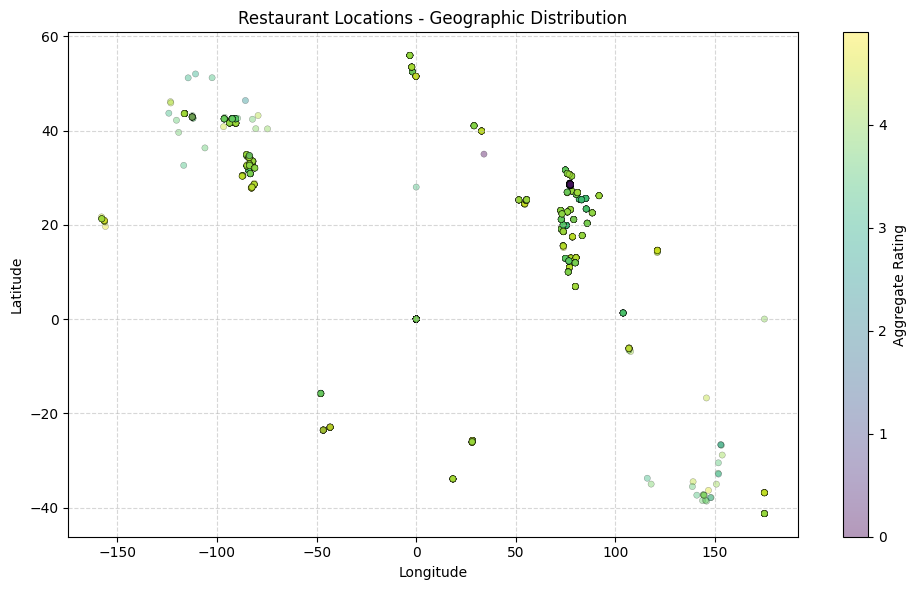

In [11]:
# Drop missing values in location columns
df = df.dropna(subset=['Longitude', 'Latitude'])

# Scatter plot of restaurant locations
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'],
            alpha=0.4,          # transparency
            s=20,               # point size
            c=df['Aggregate rating'],  # color by rating
            cmap='viridis',     # color map
            edgecolor='k',      # black edge for points
            linewidth=0.3)

plt.title('Restaurant Locations - Geographic Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Aggregate Rating')  # show color bar for ratings
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**TASK 4: Restaurant Chains**

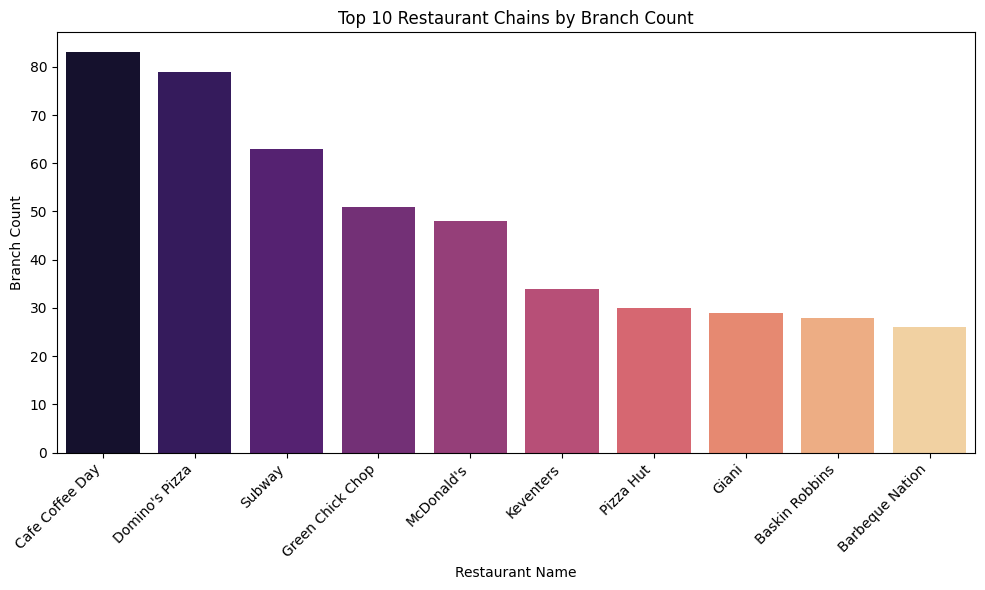

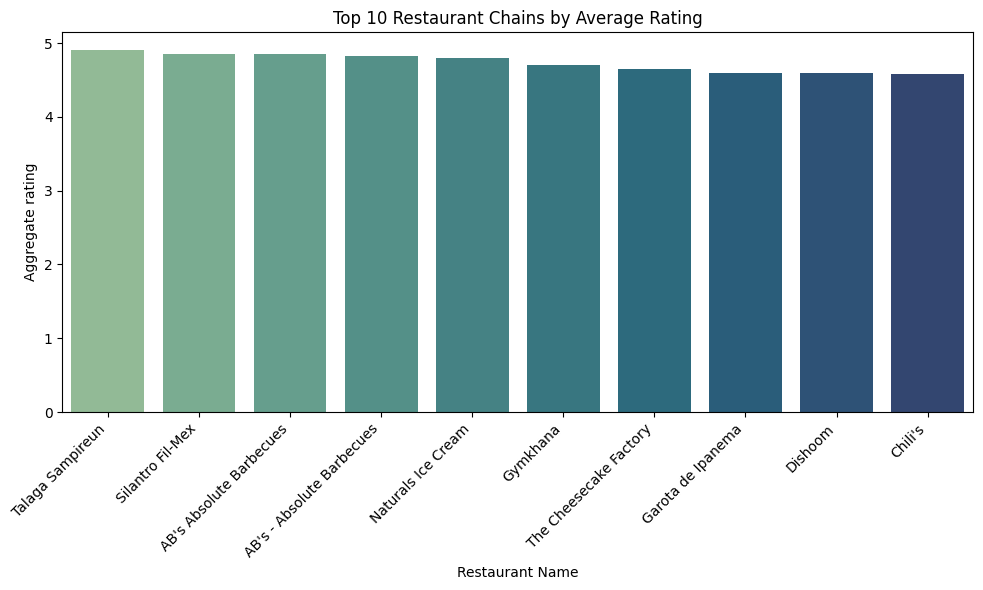

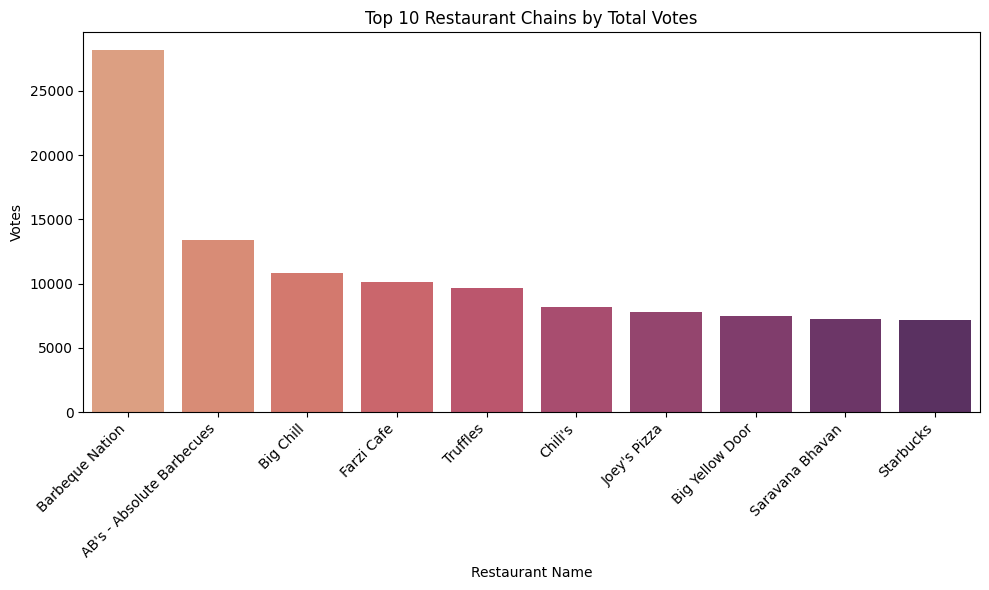

In [13]:
# clean data
df = df.dropna(subset=['Restaurant Name', 'Aggregate rating', 'Votes'])

# Convert to proper types
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Count restaurants by name to find chains
restaurant_counts = df['Restaurant Name'].value_counts()
chains = restaurant_counts[restaurant_counts > 1].index

# Filter chain restaurants
chain_data = df[df['Restaurant Name'].isin(chains)]

# Group by chain name
chain_summary = chain_data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant Name': 'count'
}).rename(columns={'Restaurant Name': 'Branch Count'}).reset_index()

# Top 10 most common chains
top_chains = chain_summary.sort_values(by='Branch Count', ascending=False).head(10)

# Plot - Top 10 Chains by Number of Outlets
plt.figure(figsize=(10,6))
sns.barplot(data=top_chains, x='Restaurant Name', y='Branch Count', hue='Restaurant Name', legend=False, palette='magma')
plt.title("Top 10 Restaurant Chains by Branch Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot - Top 10 Chains by Average Rating
top_rated_chains = chain_summary.sort_values(by='Aggregate rating', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_rated_chains, x='Restaurant Name', y='Aggregate rating', hue='Restaurant Name', legend=False, palette='crest')
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot - Top 10 Chains by Votes
most_voted_chains = chain_summary.sort_values(by='Votes', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=most_voted_chains, x='Restaurant Name', y='Votes', hue='Restaurant Name', legend=False, palette='flare')
plt.title("Top 10 Restaurant Chains by Total Votes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

💡 Insights

1. Most restaurants had average ratings (3.5–4.0), indicating consistent service quality.

2. North Indian–Chinese was the most frequent and well-rated cuisine combination.

3. High-rated restaurants clustered in urban centers, with visible density patterns.

4. Leading chains like Domino’s and Café Coffee Day had the most outlets but moderate ratings, while smaller chains often scored higher.